reference: https://www.cnblogs.com/AIBigTruth/p/9661874.html

In [1]:
import numpy as np            
import pandas as pd
import tensorflow
import keras
from keras.utils import np_utils
np.random.seed(10)          
from keras.datasets import mnist 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)=mnist.load_data()
print('train data=',len(x_train_image))
print('test data=',len(x_test_image))
print('x_train_image:',x_train_image.shape)
print('y_train_label:',y_train_label.shape)

11493376/11490434 [==============================] - 13s 1us/step
train data= 60000
test data= 10000
x_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [3]:
def plot_image(image):
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()
y_train_label[0]

5

In [4]:
def plot_image_labels_prediction(image,lables,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:
        num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(image[idx],cmap='binary')
        title="lable="+str(lables[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

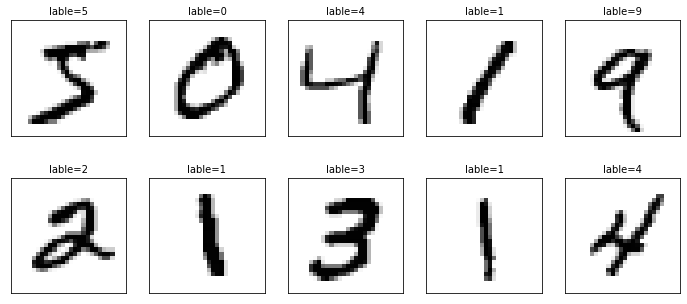

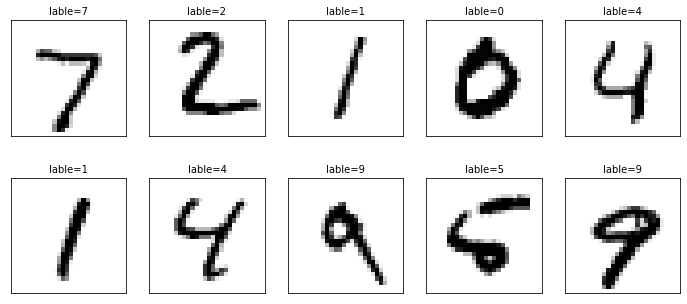

In [5]:
plot_image_labels_prediction(x_train_image,y_train_label,[],0,10)
plot_image_labels_prediction(x_test_image,y_test_label,[],0,10)

x_Train=x_train_image.reshape(60000,784).astype('float32') 
x_Test=x_test_image.reshape(10000,784).astype('float32')
x_Train_normalize=x_Train/255    
x_Test_normalize=x_Test/255
# one-hot encoding
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=np_utils.to_categorical(y_test_label)

# Build the model

In [48]:
from keras.models import Sequential 
from keras.layers import Dense  
model=Sequential()

In [49]:
#build the input layer and hidden layer
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='sigmoid'))

#build the output layer
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# Do the training

In [50]:
#show the training process
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')    
    plt.show()

In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,validation_split=0.2,
                        epochs=30,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
 - 1s - loss: 0.8774 - accuracy: 0.8049 - val_loss: 0.3908 - val_accuracy: 0.9032
Epoch 2/30
 - 1s - loss: 0.3497 - accuracy: 0.9053 - val_loss: 0.2855 - val_accuracy: 0.9218
Epoch 3/30
 - 1s - loss: 0.2798 - accuracy: 0.9208 - val_loss: 0.2457 - val_accuracy: 0.9327
Epoch 4/30
 - 1s - loss: 0.2415 - accuracy: 0.9304 - val_loss: 0.2188 - val_accuracy: 0.9392
Epoch 5/30
 - 1s - loss: 0.2131 - accuracy: 0.9388 - val_loss: 0.2009 - val_accuracy: 0.9433
Epoch 6/30
 - 1s - loss: 0.1913 - accuracy: 0.9451 - val_loss: 0.1850 - val_accuracy: 0.9487
Epoch 7/30
 - 1s - loss: 0.1720 - accuracy: 0.9509 - val_loss: 0.1701 - val_accuracy: 0.9542
Epoch 8/30
 - 1s - loss: 0.1561 - accuracy: 0.9554 - val_loss: 0.1615 - val_accuracy: 0.9558
Epoch 9/30
 - 1s - loss: 0.1422 - accuracy: 0.9599 - val_loss: 0.1527 - val_accuracy: 0.9573
Epoch 10/30
 - 1s - loss: 0.1305 - accuracy: 0.9625 - val_loss: 0.1420 - val_accuracy: 0.9606
Epoch 11/30
 - 1s -

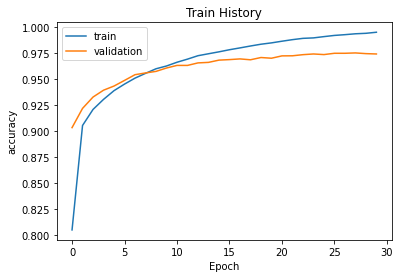

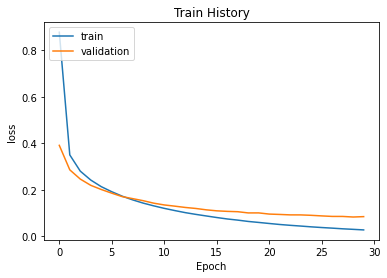

10000/10000 [==============================] - 0s 27us/step
accuracy 0.9775000214576721


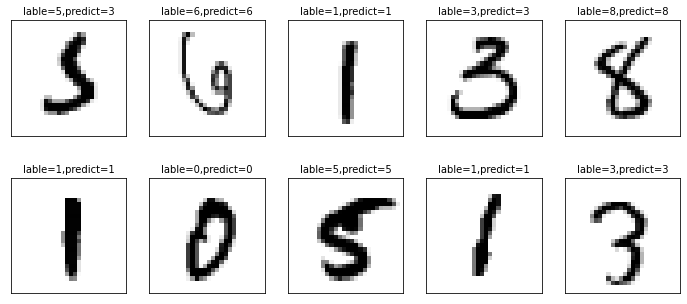

In [52]:
show_train_history(train_history,'accuracy','val_accuracy')   
show_train_history(train_history,'loss','val_loss') 

# evaluate the accuracy
scores=model.evaluate(x_Test_normalize,y_Test_OneHot)   
print('accuracy',scores[1])

# do the prediction
prediction=model.predict_classes(x_Test)
prediction
plot_image_labels_prediction(x_test_image,y_test_label,prediction,idx=340)